<a href="https://colab.research.google.com/github/Alexfdn/HW1_python/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime

In [109]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 5000
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
        }

    def get_ids(self):
        paramz = {'offset': self.offset_,'limit': self.limit_,'sortField': 'devId.devShortCleanNm','sortType': 'asc','objStatus': '0',}
        res = requests.get(self.url, headers=self.headers, params=paramz)
        objects_data = res.json()
        objids = [x.get('objId') for x in objects_data.get('data').get('list')]
        return objids

    def show_ids(self):
        print(self.get_ids())

In [110]:
class ObjectInfoExtractor:
    def __init__(self):
        self.objids = DomIdLoader().get_ids()
        self.headers = DomIdLoader().headers
        self.objects_array = []
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'

    def load_data(self):
        for i in range(len(self.objids)):
            url_object = self.url + f'{self.objids[i]}'
            try:
                objitem = requests.get(url_object, headers=self.headers)
                objitemjs = objitem.json()
                data_item = objitemjs.get('data')
                res_img = [x.get('objRenderPhotoUrl') for x in data_item.get('photoRenderDTO')]

                data = self.df_converter(data_item, res_img, i)
                self.objects_array.append(data)
            except:
                continue
        return self.objects_array

    def df_converter(self, data_item, res_img, index):
        data = pd.DataFrame({
            'region': data_item.get('region'),'year': datetime.datetime.strptime(data_item.get('objReady100PercDt'), "%Y-%m-%d").year,
            'date': data_item.get('objReady100PercDt'),'objPriceAvg': data_item.get('objPriceAvg'),'objFloorCnt': data_item.get('objFloorCnt'),
            'objFlatCnt': data_item.get('objFlatCnt'),'objSquareLiving': data_item.get('objSquareLiving'),'objElemParkingCnt': data_item.get('objElemParkingCnt'),
            'img': res_img[0]}, index=[index])
        return data

In [97]:
class Saver:
    def __init__(self, data, name):
        self.objects = pd.concat(data)
        self.name = name

    def save_csv(self):
        self.objects.to_csv(self.name + ".csv")
    
    def save_excel(self):
        self.objects.to_excel(self.name + ".excel")

    def save_json(self):
        self.objects.to_json(self.name + ".json")

In [105]:
class Visualizer:
    def __init__(self):
        self.data = pd.read_json('name.json')

    def make_boxplot(self):
        
        floors_house = self.data.loc[self.data['objFloorCnt'].notna()].groupby('region')['objFloorCnt'].mean()
        plt.subplots(figsize=(16, 6))
        floors_house.sort_values().plot(kind='bar')
        plt.title('Этажность домов')
        plt.show()
        
        avg_price = self.data.loc[self.data['objPriceAvg'].notna()].groupby('region')['objPriceAvg'].mean()
        avg_price.sort_values(ascending=True).plot(kind='bar')
        plt.title("Цена за квадратный метр")
        plt.show()

        flats_region = self.data.loc[self.data['objFlatCnt'].notna()].groupby('region')['objFlatCnt'].mean()
        plt.subplots(figsize=(19, 8))
        flats_region.sort_values().plot(kind='bar')
        plt.title('Среденее количество квартир по регионам')
        plt.show()

        area_region = self.data.loc[self.data['objSquareLiving'].notna()].groupby('region')['objSquareLiving'].mean()
        plt.subplots(figsize=(16, 6))
        area_region.sort_values().plot(kind='bar')
        plt.title('Средняя жилая площадь по регионам')
        plt.show()

        park = self.data.loc[self.data['objElemParkingCnt'].notna()].groupby('region')['objElemParkingCnt'].mean()
        plt.subplots(figsize=(16, 6))
        park.sort_values().plot(kind='bar')
        plt.title('Количество парковочных мест')
        plt.show()



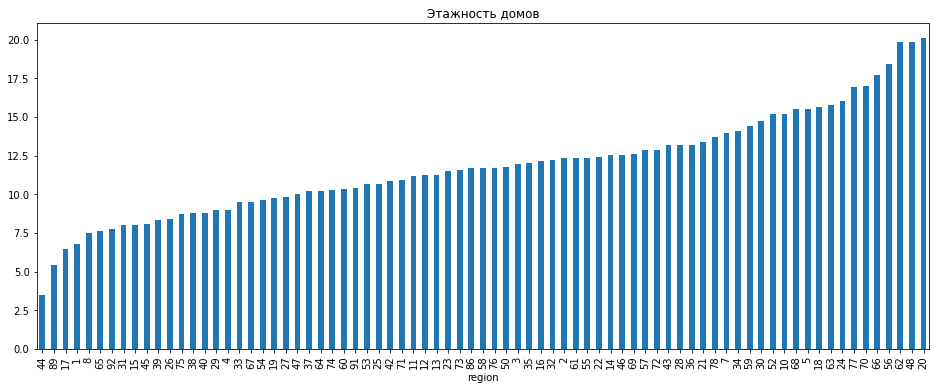

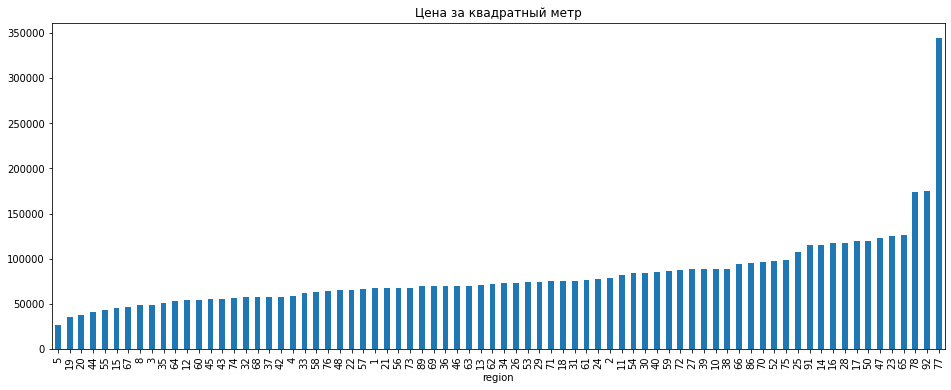

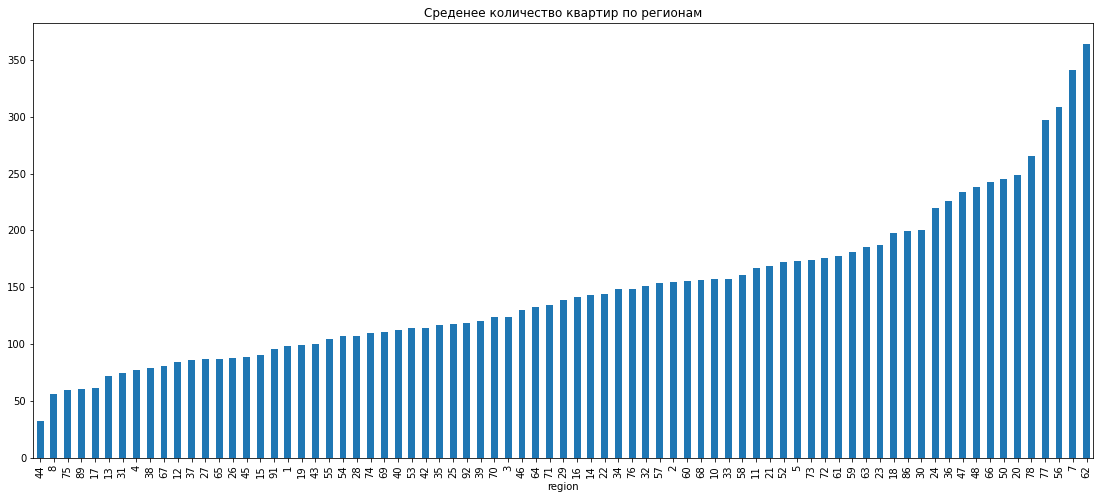

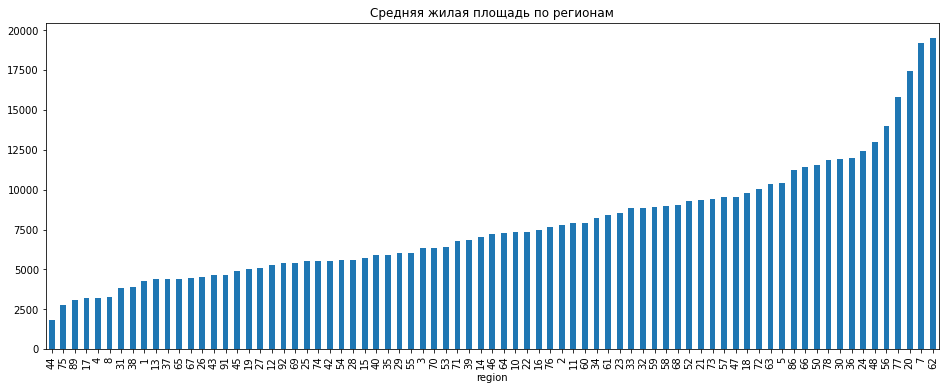

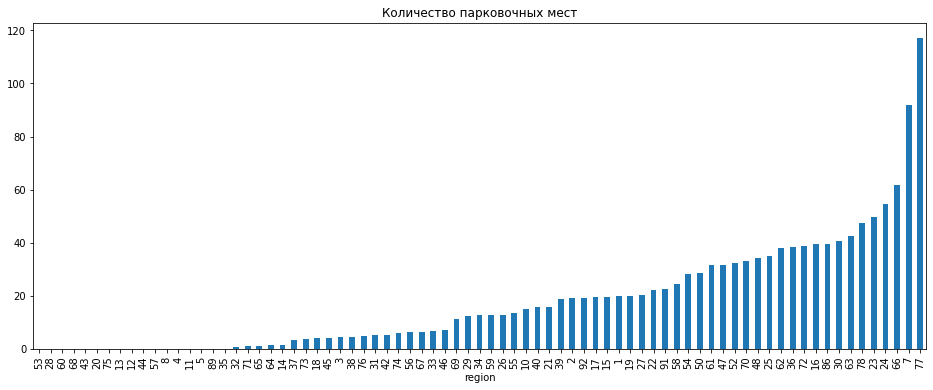

In [108]:
data = ObjectInfoExtractor().load_data()
res = Saver(data, "name")
res.save_json()

shape = Visualizer()
shape.make_boxplot()

